<a href="https://colab.research.google.com/github/nysfoz/DistrictPostcodeMapping/blob/main/Postcode_to_district_join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget https://raw.githubusercontent.com/nysfoz/DistrictPostcodeMapping/main/requirments.txt

--2023-02-28 05:04:22--  https://raw.githubusercontent.com/nysfoz/DistrictPostcodeMapping/main/requirments.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 296 [text/plain]
Saving to: ‘requirments.txt.1’

requirments.txt.1   100%[===================>]     296  --.-KB/s    in 0s      

2023-02-28 05:04:22 (28.5 MB/s) - ‘requirments.txt.1’ saved [296/296]



In [9]:
!pip install -r requirments.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import geopandas as gp
import plotly.express as px


In [11]:
postcode= gp.read_file("https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/POA_2021_AUST_GDA2020_SHP.zip")

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.



<AxesSubplot:>

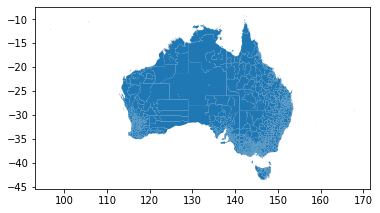

In [12]:
postcode.plot()

In [13]:
postcode

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,0800,0800,AUS,Australia,3.1731,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.081893,0.000264,"POLYGON ((130.83681 -12.45376, 130.83684 -12.4..."
1,0810,0810,AUS,Australia,24.4283,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.241859,0.002031,"POLYGON ((130.89986 -12.36567, 130.89875 -12.3..."
2,0812,0812,AUS,Australia,35.8899,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.278788,0.002983,"POLYGON ((130.91915 -12.40786, 130.91831 -12.4..."
3,0820,0820,AUS,Australia,39.0642,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.409134,0.003248,"POLYGON ((130.85260 -12.43994, 130.85089 -12.4..."
4,0822,0822,AUS,Australia,150775.8030,http://linked.data.gov.au/dataset/asgsed3/POA/...,90.601831,12.564238,"MULTIPOLYGON (((136.56648 -12.08392, 136.56704..."
...,...,...,...,...,...,...,...,...,...
2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341555,0.636169,"MULTIPOLYGON (((144.79215 -41.46478, 144.79212..."
2640,7470,7470,AUS,Australia,108.2441,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.781048,0.011725,"POLYGON ((145.57769 -41.78640, 145.57686 -41.7..."
2641,9494,No usual address (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None
2642,9797,Migratory - Offshore - Shipping (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None


In [14]:
Rd =gp.read_file("map (1).geojson").to_crs("7844")

<AxesSubplot:>

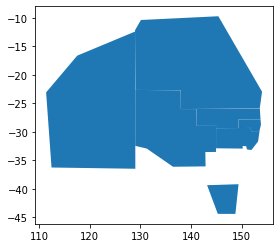

In [15]:
Rd.plot()

In [16]:
Rd

,RotaryDistrict,geometry
0,9830,"POLYGON ((143.17433 -39.38577, 145.28395 -44.4..."
1,9423,"POLYGON ((128.94448 -12.40727, 117.55513 -16.6..."
2,9560,"POLYGON ((128.95652 -12.16759, 129.03085 -22.0..."
3,9510,"POLYGON ((129.00056 -22.65058, 129.00053 -32.4..."
4,9620,"POLYGON ((141.04724 -25.98728, 141.02413 -28.9..."
5,9640,"POLYGON ((153.71157 -27.81380, 149.35588 -27.8..."
6,9660,"POLYGON ((144.94189 -29.36807, 144.93536 -32.9..."


In [17]:

join= Rd.sjoin(postcode,how='left',predicate='contains' )


In [18]:
join
join.reset_index()

,index,RotaryDistrict,geometry,index_right,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area
0,0,9830,"POLYGON ((143.17433 -39.38577, 145.28395 -44.4...",2638,7468,7468,AUS,Australia,309.9494,http://linked.data.gov.au/dataset/asgsed3/POA/...,2.114872,0.033768
1,0,9830,"POLYGON ((143.17433 -39.38577, 145.28395 -44.4...",2636,7466,7466,AUS,Australia,68.8166,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.737044,0.007487
2,0,9830,"POLYGON ((143.17433 -39.38577, 145.28395 -44.4...",2637,7467,7467,AUS,Australia,144.0971,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.765625,0.015677
3,0,9830,"POLYGON ((143.17433 -39.38577, 145.28395 -44.4...",2640,7470,7470,AUS,Australia,108.2441,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.781048,0.011725
4,0,9830,"POLYGON ((143.17433 -39.38577, 145.28395 -44.4...",2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341555,0.636169
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,6,9660,"POLYGON ((144.94189 -29.36807, 144.93536 -32.9...",355,2431,2431,AUS,Australia,45.9673,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.394901,0.004337
1416,6,9660,"POLYGON ((144.94189 -29.36807, 144.93536 -32.9...",367,2452,2452,AUS,Australia,12.7764,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.189795,0.001199
1417,6,9660,"POLYGON ((144.94189 -29.36807, 144.93536 -32.9...",371,2456,2456,AUS,Australia,205.4443,http://linked.data.gov.au/dataset/asgsed3/POA/...,1.036588,0.019221
1418,6,9660,"POLYGON ((144.94189 -29.36807, 144.93536 -32.9...",368,2453,2453,AUS,Australia,2157.9951,http://linked.data.gov.au/dataset/asgsed3/POA/...,3.254996,0.202264


In [19]:
def WhichRD(postcode):
  try:
    return join[join.POA_CODE21==postcode].RotaryDistrict.values.tolist()
  except:
    return "UNKNOW"


In [20]:
WhichRD("7119")

[9830]

In [21]:
Rd[["RotaryDistrict"]]

,RotaryDistrict
0,9830
1,9423
2,9560
3,9510
4,9620
5,9640
6,9660


In [22]:
join[["RotaryDistrict","POA_CODE21"]].to_csv("RDPO.csv", index =False)